#### Import Libraly

In [313]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

In [314]:
%matplotlib inline

<img src="スクリーンショット 2016-08-26 11.32.51.png">

<img src="スクリーンショット 2016-08-26 11.36.01.png">

In [315]:
train = pd.read_csv("./train.csv")

In [316]:
test = pd.read_csv("./test.csv")

#### まずはデータの詳細を確認

In [317]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
S1      25010 non-null int64
C1      25010 non-null int64
S2      25010 non-null int64
C2      25010 non-null int64
S3      25010 non-null int64
C3      25010 non-null int64
S4      25010 non-null int64
C4      25010 non-null int64
S5      25010 non-null int64
C5      25010 non-null int64
hand    25010 non-null int64
dtypes: int64(11)
memory usage: 2.1 MB


#### データに欠損値はない。また、全て整数型のデータ。

In [318]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
id    1000000 non-null int64
S1    1000000 non-null int64
C1    1000000 non-null int64
S2    1000000 non-null int64
C2    1000000 non-null int64
S3    1000000 non-null int64
C3    1000000 non-null int64
S4    1000000 non-null int64
C4    1000000 non-null int64
S5    1000000 non-null int64
C5    1000000 non-null int64
dtypes: int64(11)
memory usage: 83.9 MB


#### テストデータも欠損値なし。また、全て数値型のデータ。

#### 次に、生データを見てみる。

In [319]:
train

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0
5,2,5,1,5,2,13,2,3,3,13,2
6,3,10,4,6,1,4,2,13,4,5,0
7,4,10,3,1,2,13,4,2,4,7,0
8,3,2,4,10,3,3,4,4,1,9,0
9,2,7,3,8,4,8,2,13,2,12,1


#### handの値を予測すれば良い。ここで、handとは役の種類を表す
0: Nothing in hand; not a recognized poker hand   
1: One pair; one pair of equal ranks within five cards  
2: Two pairs; two pairs of equal ranks within five cards  
3: Three of a kind; three equal ranks within five cards  
4: Straight; five cards, sequentially ranked with no gaps  
5: Flush; five cards with the same suit  
6: Full house; pair + different rank three of a kind  
7: Four of a kind; four equal ranks within five cards  
8: Straight flush; straight + flush  
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush
#### http://pokernavi.jp/howto/basic3.htm

(array([  5.55022435e-01,   4.70878315e-01,   5.35785686e-02,
          2.27908836e-02,   4.13168066e-03,   2.39904038e-03,
          1.59936026e-03,   2.66560043e-04,   2.22133369e-04,
          2.22133369e-04]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

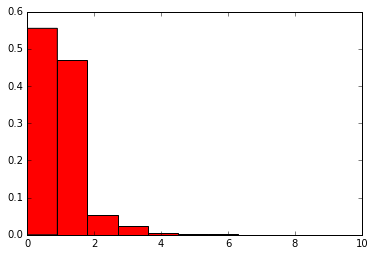

In [320]:
plt.hist(train["hand"],normed=True,color=["red"])

In [321]:
test

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6
5,6,1,4,3,10,2,11,2,6,1,7
6,7,1,10,3,8,1,4,3,11,3,9
7,8,2,11,3,8,1,1,1,11,2,3
8,9,3,4,1,1,1,3,3,5,3,6
9,10,3,12,2,1,1,3,1,2,3,10


In [322]:
train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


#### 今回はアンサンブル学習を行うため、scikit-learnのEnsemble methodsを使用する

#### 学習内容的に分類分けを行えば良い気がするのでEnsemble methodsのForests of randomized treesで学習を行ってみる

#### まず、訓練用データとテスト用データを整形する

In [323]:
X = train[["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5"]]
Y = train["hand"]
test_X = test[["S1","C1","S2","C2","S3","C3","S4","C4","S5","C5"]]
test_id = test["id"]

#### fitしてpredict

In [324]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X,Y)
py = clf.predict(X)

In [325]:
print(py)

[0 0 2 ..., 0 0 1]


#### 予測結果の評価を行う。scikit-learnのaccuracy_scoreモジュールを使う(便利)

In [326]:
from sklearn.metrics import accuracy_score

In [327]:
accuracy_score(Y,py)

0.98404638144742107

In [328]:
accuracy_score(Y,py,normalize=False)

24611

(array([  6.35024000e+05,   3.61094000e+05,   0.00000000e+00,
          3.01900000e+03,   0.00000000e+00,   7.61000000e+02,
          5.70000000e+01,   0.00000000e+00,   3.40000000e+01,
          1.10000000e+01]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

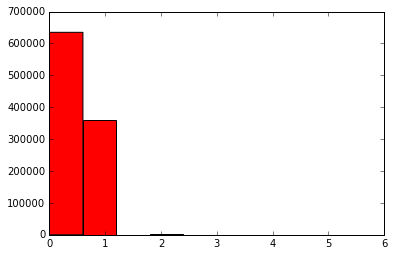

In [329]:
py_test = clf.predict(test_X)
py_test = pd.DataFrame({"hand":py_test})
plt.hist(py_test["hand"],color=["red"])

In [330]:
pd.concat([test_id,py_test],axis=1).to_csv("pred_result.csv",index=False)

#### 一旦提出してみる。

<img src="スクリーンショット 2016-08-25 16.20.07.png">

#### マークダウンよりは上だけどめちゃめちゃ微妙な順位

#### RandomForestのライブラリのドキュメントをもっかい見てみる。推定量が指定できるっぽい

<img src="スクリーンショット 2016-08-26 11.58.25.png">

In [331]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X,Y)
py = clf.predict(X)
accuracy_score(Y,py)

1.0

#### 試しに推定量をdefaultの10倍の100にしたら正答率1.0になった。
#### 時間余ったので他のアンサンブル学習もやってみる。

#### bagging

In [332]:
from sklearn.ensemble import BaggingClassifier

In [333]:
from sklearn import tree

In [334]:
bagging = BaggingClassifier(tree.DecisionTreeClassifier(),max_samples=0.5, max_features=0.5)

In [335]:
bagging = bagging.fit(X, Y)

In [336]:
py = bagging.predict(X)
accuracy_score(Y,py)

0.86077568972411034

#### AdaBoost

In [337]:
from sklearn.ensemble import AdaBoostClassifier

In [338]:
AdaBoost = AdaBoostClassifier(n_estimators=100)

In [339]:
AdaBoost = AdaBoost.fit(X, Y)
py = AdaBoost.predict(X)
accuracy_score(Y,py)

0.49036385445821673